In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

Sydney prices for 2016 - 2022

In [2]:
ds = pd.read_csv("./domain_properties.csv")

In [3]:
ds.head()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59
3,452000,13/1/16,Leumeah,1,3,1,344,House,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12
4,365500,13/1/16,North Avoca,0,0,0,1850,Vacant land,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98


In [4]:
ds.tail()

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
11155,1900000,31/12/21,Kellyville,3,4,2,540,House,27971,46228,18.645,-33.69583,150.95622,78,0.1,220.1,30.08
11156,1300000,31/12/21,Seven Hills,3,7,2,1208,House,19326,33540,9.629,-33.77743,150.94272,38,0.1,220.1,26.58
11157,1025000,31/12/21,Sydney,2,2,1,129,Apartment / Unit / Flat,17252,35412,2.940,-33.86794,151.20998,65,0.1,220.1,0.31
11158,1087500,1/1/22,Prestons,2,4,2,384,House,15313,36244,9.215,-33.94155,150.87334,28,0.1,220.1,32.26
11159,1000000,1/1/22,Ourimbah,2,3,2,667,House,3951,37180,87.154,-33.31517,151.32611,191,0.1,220.1,61.95


In [5]:
ds.describe()

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
count,1.116000e+04,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826
std,1.290371e+06,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113
min,2.250000e+05,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000
25%,1.002000e+06,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000
50%,1.388000e+06,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000
75%,2.020000e+06,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000
max,6.000000e+07,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

In [7]:
ds.loc[:, 'year'] = pd.to_numeric(ds['date_sold'].apply(lambda x: x.split('/')[-1] if isinstance(x, str) else None), errors='coerce')

Data Cleanup

In [8]:
ds = ds.loc[ds['property_size'] <= 768]
ds = ds.loc[ds['num_bed'] <= 4]
ds = ds.loc[ds['price'] <= 185e4]
ds.describe()

,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,year
count,5.306000e+03,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000
mean,1.070202e+06,1.645873,3.125707,1.668865,464.241802,9673.876555,38302.841312,5.220374,-33.778879,151.085678,48.431210,0.771856,183.543781,29.719338,19.207878
std,3.976080e+05,0.660391,0.888205,0.990549,201.627356,7211.497936,10366.110243,5.915542,0.220602,0.222278,43.868563,0.681723,24.103817,19.040993,1.798927
min,2.250000e+05,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.574780,0.000000,0.100000,150.900000,0.310000,16.000000
25%,7.150000e+05,1.000000,3.000000,1.000000,303.250000,4716.000000,31512.000000,2.027000,-33.941090,150.922700,20.000000,0.100000,166.400000,14.622500,18.000000
50%,1.070000e+06,2.000000,3.000000,2.000000,534.000000,8116.000000,37024.000000,3.734000,-33.828390,151.081180,37.000000,0.430000,172.600000,25.370000,20.000000
75%,1.375000e+06,2.000000,4.000000,2.000000,619.000000,12566.000000,43680.000000,6.805000,-33.706335,151.215800,62.000000,1.500000,210.100000,44.130000,21.000000
max,1.850000e+06,4.000000,4.000000,12.000000,768.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,370.000000,2.000000,220.100000,84.790000,22.000000


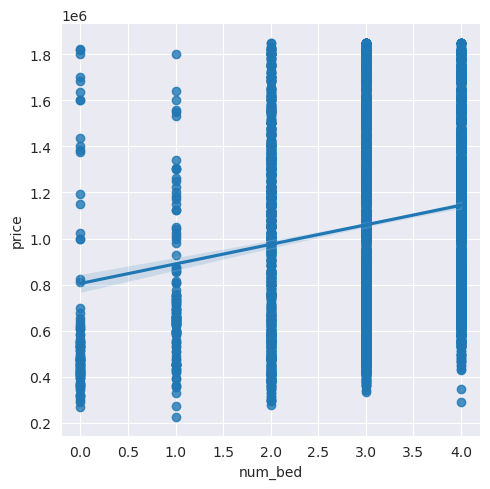

In [9]:
sns.lmplot(x="num_bed", y="price", data=ds)

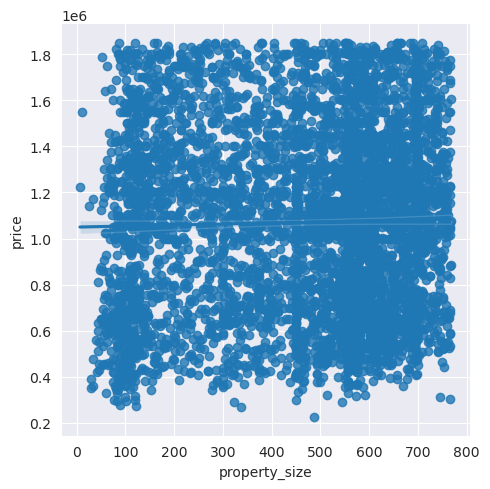

In [10]:
sns.lmplot(x="property_size", y="price", data=ds)

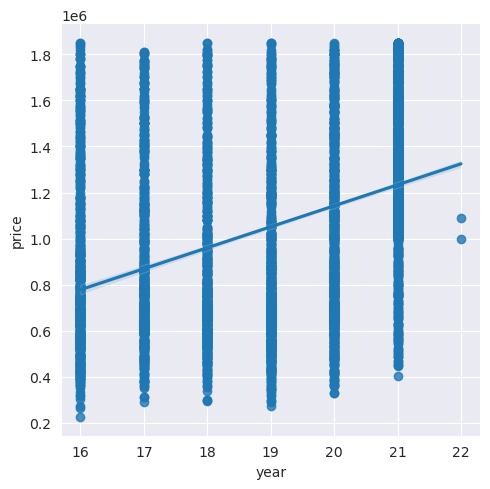

In [11]:
sns.lmplot(x="year", y="price", data=ds)

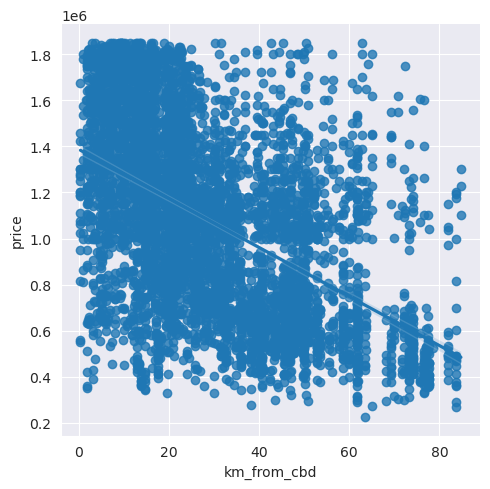

In [12]:
sns.lmplot(x="km_from_cbd", y="price", data=ds)

Training sets


In [13]:
X = ds[["km_from_cbd", "year", "num_bed"]]
y = ds[["price"]]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X_train

,km_from_cbd,year,num_bed
3786,15.28,19,3
10704,5.06,21,2
971,18.45,16,2
2017,0.31,17,2
3452,10.09,19,4
...,...,...,...
5327,19.07,20,4
7147,24.81,21,3
10923,35.82,21,4
10982,20.47,21,2


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
linear_model = LinearRegression()

In [18]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [19]:
print("Coef: ", linear_model.coef_)

Coef:  [[-11549.34158393  69849.30000773 144916.5636164 ]]


In [20]:
prediction = linear_model.predict(X_test)

Text(0, 0.5, 'New Predicted Y')

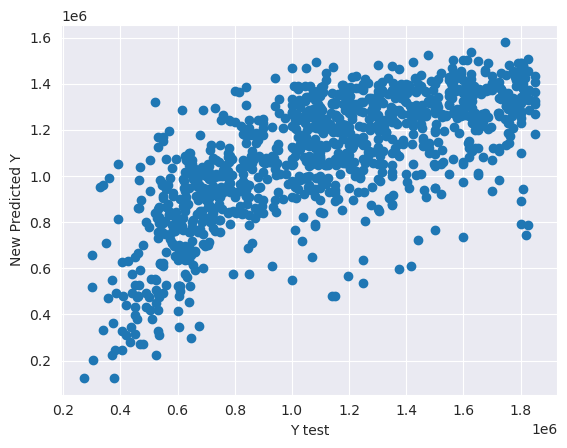

In [21]:
plt.scatter(y_test, prediction)
plt.xlabel("Y test")
plt.ylabel("New Predicted Y")

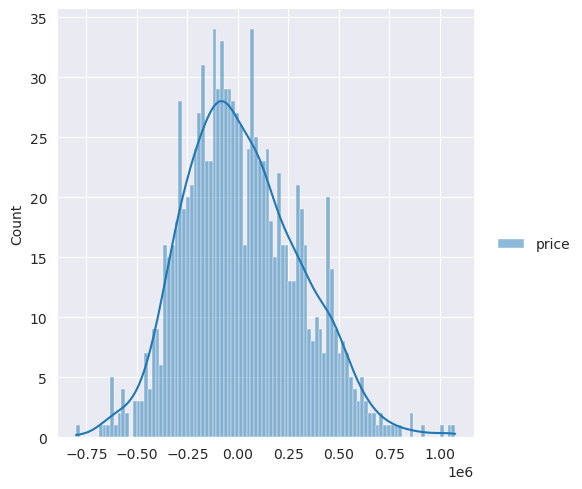

In [23]:
sns.displot((y_test-prediction), bins=100, kde=True)

In [28]:
data = {
    "km_from_cbd": [5, 5 ,5],
    "year": [25, 30, 40],
    "num_bed": [2, 2 ,2]

}
ds_pred = pd.DataFrame(data)

In [29]:
ds_pred

,km_from_cbd,year,num_bed
0,5,25,2
1,5,30,2
2,5,40,2


In [30]:
new_pred = linear_model.predict(ds_pred)
new_pred_rounded = np.round(new_pred, 2)

In [31]:
print(new_pred_rounded)

[[1592846.26]
 [1942092.76]
 [2640585.76]]
